# ELM from scratch

In this notebook we are going to implement an Extreme Learning Machine model, by following the original notation in the Huang's paper.



### Dataset Loading 
Let's start first by loading the dataset. We are going to use pandas `load_csv` function for simplicity

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale

low, high = -1, 1

# Load the raw dataset, shuffle it, then split it into train and test set
dataset = pd.read_csv('Abalone.csv', header=None).to_numpy()
np.random.shuffle(dataset)
# split the dataset between instances (x_i) and targets (t_i)
D, t = dataset[:, :-1], dataset[:, -1]
# normalize the value of X to be between (low-hi)
D = minmax_scale(D) * 2 - 1

N = len(D)
test_size = int(0.33 * N)  # should be between 0-1
test, test_T, train, train_T = D[: test_size], t[: test_size], D[test_size : ], t[test_size : ]

### Model Implementation
Now we are going to implement the model. The original paper's variabile naming and notation is as follows: 

* $m$: number of output units
* $b$: bias of hidden units
* $n$: number of input units
* $\tilde{N}$: number of hidden units
* $\beta$: output layer's weight matrix
* $\mathbf{w}$: hidden layer's weight matrix
* $g(\cdot)$: activation function
* $\mathbf{x}_i$ *i-th* example in the dataset



In [1]:
# Define the activation function
# Remember that it has to be infinitely differentiable
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

class ExtremeLearningMachine:
  def __init__(self, hidden_units, input_units, output_units, activation_function, wbounds = (-1, 1)):
    self.N_tilde = hidden_units
    self.n = input_units
    self.m = output_units
    self.g = activation_function
    (low, high) = wbounds
    # Both weights and biases are initialized randomly from a sample interval [low; high]
    self.w = np.random.uniform(low, high, size=(self.n, self.N_tilde))
    self.beta = np.random.uniform(low, high, size = (self.N_tilde, self.m))
    self.b = np.random.uniform(low, high, size=self.N_tilde)

  def fit(self, X, T):
    # Training the model consists of computing the hidden layer's output matrix (H), 
    # and then use it in order to compute the output weight matrix by pseudoinversion.
    H = self.g(X.dot(self.w) + self.b)
    self.beta = np.linalg.pinv(H) @ T

  def predict(self, X):
    # Predicting 
    H = self.g(X.dot(self.w) + self.b)
    return H.dot(self.beta)

Let's move on and use our new model to predict some data

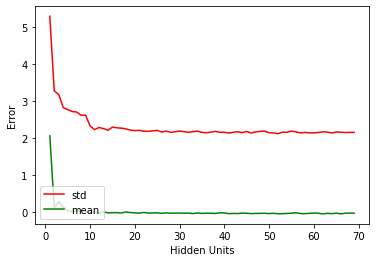

In [ ]:
import matplotlib.pyplot as plt

def evaluate_model(n_hid):
  elm_model = ExtremeLearningMachine(n_hid, D.shape[1], 1, sigmoid)
  elm_model.fit(train, train_T)
  predicted = elm_model.predict(test)
  # Compute the mse
  err = test_T - predicted
  std = np.std(err)
  mean = np.mean(err)
  return (mean, std)

# Iterate from 5 to 70 hidden layers, creating every time a new model
n_hid = np.arange(1, 70)
mean, std = np.vectorize(evaluate_model)(n_hid)

# Plot the results
plt.xlabel("Hidden Units")
plt.ylabel("Error")
plt.plot(n_hid, std, color='r', label = 'std')
plt.plot(n_hid, mean, color='g', label = 'mean')
plt.legend(loc='lower left')